# Merge two gene datasets in one

Made by: Cynthia Soto <br>
Date: March 19th 2021 <br>
Last md: May 19th 2021 <br>

**Assumptions:** <br>
1. Datasets are a tvs file with standardized log2(TPM+1)values.

**Code goal:** <br>
1. It merge two datasets in one to analyze the stats in a single dataset. <does not have outlier distributions> <br>
    2. It load the dataset with infected plants. <br>
    3. It loads the dataset with the healthy plants. <br>
    4. Both files are merged in an hybrid dataset. <br>
2. Some stats and distributions are get it.   <br>
3. Plot.

In [1]:
# Libraries required
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set some initial configuration 
pd.set_option("display.precision", 3)

In [2]:
# Set the directory to parse and the base_name of the dataset 
# notice all plots and files will use this base_name to label objects)

#  @dir_to_parse        Set the folder to be parse (the raw count must to be there)
#  @general_titles      This var is used to label the plots and save the main and temporary files. 

###   Choose what dataset you are going to process
#general_titles="healthy"
general_titles="infected"

In [3]:
try:
    # Change the current working Directory      
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/matrices_de_expresion/")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")        

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/matrices_de_expresion


## Declare functions

In [95]:
###################################################
#             MATRIX B
# Plot the distributions: values are TPM normalized
###################################################

#def df_KDE(df_p, samples, main_t, x_label):
def plot_KDE(df, s_type, samples, title, y_label):  
    ## @df: the array(df) to be plotted (w/o column gene's names)
    ## @s_type: type of matrix A, B, C, D or E
    ## @samples: the names to be displayed in the leyend label
    ## @title: text to be displayed as main-header in the plot
    ## @y_label: text to be displayed in the "y" axis label.

    plt.figure(figsize=(10,7), dpi= 80)
    #plt.style.use('seaborn-whitegrid')
    sns.set_style("whitegrid")
    
    kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})
    plt.rc('xtick',labelsize=16)
    plt.rc('ytick',labelsize=16)

    for file in samples:
        sample_data = df[file].tolist()
        #print(sample_data[1:10])
        #sns.distplot(sample_data, label=ID_sample+' hpi', **kwargs)   #color="dodgerblue", 
        sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 
        
    plt.title(s_type + ': Histogram with KDE for A.thaliana',fontsize=18);
    plt.xlabel(y_label,fontsize=16);
    plt.ylabel('Probability Density',fontsize=16);
    ## add arbitrary lines to canvas
    #plt.plot([0, 15], [.15, .15], 'k-', lw=2, color='blue',marker = 'o')
    #plt.plot([0, 15], [.74, .74], 'k-', lw=2, color='red',marker = '*')
    plt.legend(loc='center right',fontsize=12);    
    #plt.savefig("../plots/all_infected_KDE_17zeros_drop.png");
    return

In [1]:
# Set ID index as "ID" to trigger the describe() function over a dataframe    
def df_with_label_ID(df_stat):
    try:
        df_stat.reset_index(level=0, inplace=True)
        df_stat.rename(columns={'index': 'ID'}, inplace=True)
        df_stat = df_stat.sort_values(['ID'], ascending=[True])   
    except:
        pass
    return df_stat 

In [10]:
# # plot the maximum values of a given df
# def plot_maximum_values(df, title, perc):
#     maxValues = df.max(axis = 1)
#     #maxValues.sort_values(axis=0, ascending=True)
#     #print(maxValues)
#     maxValues.plot()
#     plt.title("Matrix C: maximum TPM values for Athal " + title, fontsize = 14)
#     plt.ylabel("Maximum TPM", fontsize = 14)
#     plt.xlabel("Genes", fontsize = 14)
#     if perc > 0: 
#         plt.axhline(y=perc, color='b', linestyle='-')
    
#     return

In [45]:
 #Build a violin subplot chat with the option to include a swarmplot distribution
def violin_plot(dfx, s_type, ylab):
    # @dfx: array (expr.matrix)
    # @b_swarm: boolean / True=include swarmplot

    # plot style
    sns.set_palette("RdBu")
    sns.set_style("darkgrid")
    plt.rc('xtick',labelsize=1)
    plt.rc('ytick',labelsize=13)
    
    fig = plt.figure(figsize=(19, 4))
    gs = fig.add_gridspec(1, 22)       # grid spaces for 22 samples

    ## Assign the column to a pandas serie for botrytis
    Bc12 = dfx['Bc12']
    Bc12r = dfx['Bc12.1']
    Bc18 = dfx['Bc18']
    Bc18r = dfx['Bc18.1']
    Bc24 = dfx['Bc24']
    Bc24r = dfx['Bc24.1']
    ## Assign the column to a pandas serie for Colletotrichum
    Ch22 = dfx['Ch22']
    Ch22r1 = dfx['Ch22.1']
    Ch22r2 = dfx['Ch22.2']
    Ch22r3 = dfx['Ch22.3']
    Ch40 = dfx['Ch40']
    Ch40r1 = dfx['Ch40.1']
    Ch40r2 = dfx['Ch40.2']
    Ch40r3 = dfx['Ch40.3']

    H12=dfx['healthy12']
    H12r=dfx['healthy12.1']
    H18=dfx['healthy18']
    H18r=dfx['healthy18.1']
    H24=dfx['healthy24']
    H24r=dfx['healthy24.1']
    H30=dfx['healthy30']
    H30r=dfx['healthy30.1']
    
    # build violin plot #########################################################################################
    ax1 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[0, 0], sharey=ax1)

    #ax1 = fig.add_subplot(gs[0, 0])
    sns.violinplot(data=Bc12, palette='Reds')
    ax1.set_xlabel("Bc12", fontsize=14)
    ax1.set_ylabel(ylab,fontsize=16)

    ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
    sns.violinplot(data=Bc12r, palette='Reds')
    ax2.set_xlabel("Bc12.1", fontsize=14)

    ax3 = fig.add_subplot(gs[0, 2], sharey=ax1)
    sns.violinplot(data=Bc18, palette='Reds')
    ax3.set_xlabel("Bc18", fontsize=14)
    #ax3.set_title('**Zeros in common removed and Q3 threshold',fontsize=13)

    ax4 = fig.add_subplot(gs[0, 3], sharey=ax1)
    sns.violinplot(data=Bc18r, palette='Reds')
    ax4.set_xlabel("Bc18.1", fontsize=14)

    ax5 = fig.add_subplot(gs[0, 4], sharey=ax1)
    sns.violinplot(data=Bc24, palette='Reds')
    ax5.set_xlabel("Bc24", fontsize=14)

    ax6 = fig.add_subplot(gs[0, 5], sharey=ax1)
    sns.violinplot(data=Bc24r, palette='Reds')
    ax6.set_xlabel("Bc24.1", fontsize=14)

    ## Colletrotrichum
    ax7 = fig.add_subplot(gs[0, 6], sharey=ax1)
    sns.violinplot(data=Ch22, palette='Reds')
    ax7.set_xlabel("Ch22", fontsize=14)

    ax8 = fig.add_subplot(gs[0, 7], sharey=ax1)
    sns.violinplot(data=Ch22r1, palette='Reds')
    ax8.set_xlabel("Ch22.1", fontsize=14)

    ax9 = fig.add_subplot(gs[0, 8])
    sns.violinplot(data=Ch22r2, palette='Reds')
    ax9.set_xlabel("Ch22.2", fontsize=14)

    ax10 = fig.add_subplot(gs[0, 9], sharey=ax1)
    sns.violinplot(data=Ch22r3, palette='Reds')
    ax10.set_xlabel("Ch22.3", fontsize=14)

    ax11 = fig.add_subplot(gs[0, 10], sharey=ax1)
    sns.violinplot(data=Ch40, palette='Reds')
    ax11.set_xlabel("Ch40", fontsize=14)

    ax12 = fig.add_subplot(gs[0, 11], sharey=ax1)
    sns.violinplot(data=Ch40r1, palette='Reds')
    ax12.set_xlabel("Ch40.1", fontsize=14)

    ax13 = fig.add_subplot(gs[0, 12], sharey=ax1)
    sns.violinplot(data=Ch40r2, palette='Reds')
    ax13.set_xlabel("Ch40.2", fontsize=14)

    ax14 = fig.add_subplot(gs[0, 13], sharey=ax1)
    sns.violinplot(data=Ch40r3, palette='Reds')
    ax14.set_xlabel("Ch40.3", fontsize=14)      

    ax15 = fig.add_subplot(gs[0, 14], sharey=ax1)
    sns.violinplot(data=H12, palette='Greens')
    ax15.set_xlabel("H12",fontsize=14)

    ax16 = fig.add_subplot(gs[0, 15], sharey=ax1)
    sns.violinplot(data=H12r, palette='Greens')
    ax16.set_xlabel("H12.1",fontsize=14)

    ax17 = fig.add_subplot(gs[0, 16], sharey=ax1)
    sns.violinplot(data=H18, palette='Greens')
    ax17.set_xlabel("H18",fontsize=14)

    ax18 = fig.add_subplot(gs[0, 17], sharey=ax1)
    sns.violinplot(data=H18r, palette='Greens')
    ax18.set_xlabel("H18.1",fontsize=14)

    ax19 = fig.add_subplot(gs[0, 18], sharey=ax1)
    sns.violinplot(data=H24, palette='Greens')
    ax19.set_xlabel("H24",fontsize=14)

    ax20 = fig.add_subplot(gs[0, 19], sharey=ax1)
    sns.violinplot(data=H24r, palette='Greens')
    ax20.set_xlabel("H24.1",fontsize=14)

    ax21 = fig.add_subplot(gs[0, 20], sharey=ax1)
    sns.violinplot(data=H30, palette='Greens')
    ax21.set_xlabel("H30",fontsize=14)

    ax22 = fig.add_subplot(gs[0, 21], sharey=ax1)
    sns.violinplot(data=H30r, palette='Greens')
    ax22.set_xlabel("H30.1",fontsize=14)
    
    plt.setp(ax2.get_yticklabels(), visible=False)
    plt.setp(ax3.get_yticklabels(), visible=False)
    plt.setp(ax4.get_yticklabels(), visible=False)
    plt.setp(ax5.get_yticklabels(), visible=False)
    plt.setp(ax6.get_yticklabels(), visible=False)
    plt.setp(ax7.get_yticklabels(), visible=False)
    plt.setp(ax8.get_yticklabels(), visible=False)
    plt.setp(ax9.get_yticklabels(), visible=False)
    plt.setp(ax10.get_yticklabels(), visible=False)
    plt.setp(ax11.get_yticklabels(), visible=False)
    plt.setp(ax12.get_yticklabels(), visible=False)
    plt.setp(ax13.get_yticklabels(), visible=False)
    plt.setp(ax14.get_yticklabels(), visible=False)   
    plt.setp(ax15.get_yticklabels(), visible=False)
    plt.setp(ax16.get_yticklabels(), visible=False)
    plt.setp(ax17.get_yticklabels(), visible=False)
    plt.setp(ax18.get_yticklabels(), visible=False)
    plt.setp(ax19.get_yticklabels(), visible=False)
    plt.setp(ax20.get_yticklabels(), visible=False)   
    plt.setp(ax21.get_yticklabels(), visible=False)  
    plt.setp(ax22.get_yticklabels(), visible=False)  
    
    fig.suptitle(s_type + ". Violin plots with KDE for A.thaliana healthy and infected", fontsize=18)
    gs.tight_layout(fig, rect=[0, 0, 1, 0.97])
    
    return

## Load the first matrix

In [24]:
file_name = "matrix_E_infected.csv"
file_name

'matrix_E_infected.csv'

In [25]:
df_infected = pd.read_csv(file_name, header=0, sep='\t')
print(len(df_infected))
df_infected.head(3)

20274


,Genes,Bc12,Ch40.2,Ch22.2,Ch22.1,Ch22,Ch22.3,Bc12.1,Bc24.1,Bc18.1,Ch40.3,Ch40.1,Bc18,Bc24,Ch40
0,AT1G01020,3.577,3.723,4.272,4.062,4.211,4.397,3.505,3.025,3.698,3.511,3.817,3.765,3.093,3.858
1,AT1G01030,0.813,1.386,1.389,1.187,1.199,1.103,1.604,2.559,2.031,1.471,1.145,1.881,2.400,1.700
2,AT1G01040,4.321,3.955,4.673,4.450,4.374,4.716,4.350,3.896,4.445,3.914,4.011,4.469,3.854,4.082


## Load the second matrix

In [26]:
general_titles = "healthy"
file_name = "matrix_D_healthy.csv"
file_name

'matrix_D_healthy.csv'

In [27]:
df_healty=pd.read_csv(file_name, header=0, sep='\t')
print(len(df_healty))
df_healty.head(3)

19792


,Genes,healthy30.1,healthy30,healthy12,healthy18.1,healthy18,healthy24.1,healthy12.1,healthy24
0,AT1G01020,3.245,3.021,3.450,3.180,3.043,3.255,3.684,3.358
1,AT1G01030,1.366,1.473,1.558,1.297,1.506,1.773,1.372,0.952
2,AT1G01040,4.884,4.712,4.516,4.469,4.233,3.881,4.621,4.005


## merge A.thaliana healthy and infected in one hybrid matrix (outer)

In [28]:
#result = pd.merge(df_infected, df_healty, on='Gene')
result = df_infected.merge(df_healty,on=['Genes'],how='inner')

In [68]:
df_infected.tail(10)

,Genes,Bc12,Ch40.2,Ch22.2,Ch22.1,Ch22,Ch22.3,Bc12.1,Bc24.1,Bc18.1,Ch40.3,Ch40.1,Bc18,Bc24,Ch40
20264,ATMG01220,0.844,4.232,3.025,2.914,3.670,3.365,1.960,1.360,2.348,4.190,4.247,1.724,0.830,4.161
20265,ATMG01260,0.000,0.883,0.646,0.000,0.646,0.894,0.000,0.000,0.000,0.882,0.000,0.000,0.000,1.141
20266,ATMG01275,0.434,0.925,0.927,0.000,0.927,0.000,0.361,0.300,0.000,0.535,0.567,0.000,0.297,0.000
20267,ATMG01280,0.000,1.256,0.262,0.478,0.997,0.854,0.171,0.140,0.000,0.482,0.712,0.202,0.382,0.712
20268,ATMG01330,1.469,2.208,2.347,2.196,1.897,1.506,1.718,1.113,1.243,1.490,2.288,1.244,1.509,2.869
20269,ATMG01350,0.390,2.313,1.921,1.746,0.845,1.386,0.587,0.268,1.136,2.796,2.507,0.000,0.266,2.393
20270,ATMG01360,2.061,5.502,4.252,4.368,4.130,4.121,1.687,0.884,1.868,5.614,5.035,1.901,1.045,5.023
20271,ATMG01370,3.623,6.756,6.675,6.162,6.348,6.745,3.435,2.984,3.222,6.768,7.050,3.756,3.155,7.024
20272,ATMG01400,0.000,1.400,0.631,0.624,0.631,1.415,0.000,0.000,0.000,2.096,1.464,0.000,0.000,0.665
20273,ATMG01410,1.218,3.061,2.469,2.593,2.610,2.981,0.441,0.000,0.361,2.604,2.821,1.048,0.194,2.010


In [67]:
df_healty.tail(10)

,Genes,healthy30.1,healthy30,healthy12,healthy18.1,healthy18,healthy24.1,healthy12.1,healthy24
19782,ATMG01130,1.041,1.539,2.004,0.809,0.771,1.598,2.356,2.272
19783,ATMG01170,0.918,0.523,0.000,0.157,0.076,0.000,0.374,0.146
19784,ATMG01200,0.365,0.333,0.000,0.000,0.174,0.452,0.525,0.325
19785,ATMG01220,1.694,1.359,1.746,0.771,0.413,0.965,2.214,1.206
19786,ATMG01280,0.368,0.121,0.244,0.000,0.000,0.246,0.438,0.328
19787,ATMG01330,2.034,2.761,1.175,1.814,1.811,0.000,2.448,1.603
19788,ATMG01350,1.237,1.261,0.452,0.351,0.000,0.000,0.438,0.595
19789,ATMG01360,2.581,2.324,1.601,1.613,1.498,1.705,2.227,1.539
19790,ATMG01370,3.921,2.413,3.645,2.830,2.921,3.351,4.180,3.622
19791,ATMG01410,0.187,0.458,0.608,0.668,0.352,0.339,0.815,0.933


In [74]:
# Take the merge of them all, join='outer'. This is the default option as it results in zero information loss.
result = pd.merge(df_infected, df_healty,  how="outer", on=["Genes","Genes"])

In [75]:
result.shape

(20903, 23)

In [76]:
result.query('Genes == "ATMG01400"') # The comparison operator can be anything.

,Genes,Bc12,Ch40.2,Ch22.2,Ch22.1,Ch22,Ch22.3,Bc12.1,Bc24.1,Bc18.1,...,Bc24,Ch40,healthy30.1,healthy30,healthy12,healthy18.1,healthy18,healthy24.1,healthy12.1,healthy24
20272,ATMG01400,0.0,1.4,0.631,0.624,0.631,1.415,0.0,0.0,0.0,...,0.0,0.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
print(len(result))
result.tail(5)

20903


,Genes,Bc12,Ch40.2,Ch22.2,Ch22.1,Ch22,Ch22.3,Bc12.1,Bc24.1,Bc18.1,...,Bc24,Ch40,healthy30.1,healthy30,healthy12,healthy18.1,healthy18,healthy24.1,healthy12.1,healthy24
20898,AT5G64310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.568,2.920,3.850,4.101,3.989,4.561,3.461,3.552
20899,AT5G64905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.663,1.366,1.412,0.000,0.000,0.000,0.849,0.000
20900,AT5G65300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.643,3.017,2.296,1.378,1.248,3.095,2.356,0.991
20901,AT5G66985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.008,0.000,0.713,0.000,0.000,0.000,0.388,0.000
20902,ATCG01120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000,0.000,0.681,0.538,0.278,0.000,0.369,0.505


In [84]:
# For an entire DataFrame using Pandas:   AT1G01060 NaN for healthy / ATCG01120 NaN for infected
result = result.fillna(0)
result
# For an entire DataFrame using NumPy:
# df.replace(np.nan,0)

,Genes,Bc12,Ch40.2,Ch22.2,Ch22.1,Ch22,Ch22.3,Bc12.1,Bc24.1,Bc18.1,...,Bc24,Ch40,healthy30.1,healthy30,healthy12,healthy18.1,healthy18,healthy24.1,healthy12.1,healthy24
0,AT1G01020,3.577,3.723,4.272,4.062,4.211,4.397,3.505,3.025,3.698,...,3.093,3.858,3.245,3.021,3.450,3.180,3.043,3.255,3.684,3.358
1,AT1G01030,0.813,1.386,1.389,1.187,1.199,1.103,1.604,2.559,2.031,...,2.400,1.700,1.366,1.473,1.558,1.297,1.506,1.773,1.372,0.952
2,AT1G01040,4.321,3.955,4.673,4.450,4.374,4.716,4.350,3.896,4.445,...,3.854,4.082,4.884,4.712,4.516,4.469,4.233,3.881,4.621,4.005
3,AT1G01050,7.048,5.161,5.874,5.890,5.826,6.017,7.109,5.916,6.613,...,6.124,5.394,6.670,6.756,6.744,6.846,6.884,5.708,6.816,5.915
4,AT1G01060,5.183,4.839,4.486,3.440,3.367,4.414,5.281,2.309,9.289,...,1.980,5.038,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20898,AT5G64310,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,2.568,2.920,3.850,4.101,3.989,4.561,3.461,3.552
20899,AT5G64905,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.663,1.366,1.412,0.000,0.000,0.000,0.849,0.000
20900,AT5G65300,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,2.643,3.017,2.296,1.378,1.248,3.095,2.356,0.991
20901,AT5G66985,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1.008,0.000,0.713,0.000,0.000,0.000,0.388,0.000


In [87]:
result.query('Genes == "ATCG01120"') # The comparison operator can be anything.

,Genes,Bc12,Ch40.2,Ch22.2,Ch22.1,Ch22,Ch22.3,Bc12.1,Bc24.1,Bc18.1,...,Bc24,Ch40,healthy30.1,healthy30,healthy12,healthy18.1,healthy18,healthy24.1,healthy12.1,healthy24
20902,ATCG01120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.681,0.538,0.278,0.0,0.369,0.505


In [89]:
## save the new matrix hybrid
result.to_csv('matrix_hybrid.csv', sep='\t', index=False)

## Some stats for the hybrid matrix

In [90]:
## save the stats of new union matrix
df_stat=result.describe().T
df_stat.to_csv("../statistics/matrix_hybrid.csv", index=True, header=True)
df_stat

,count,mean,std,min,25%,50%,75%,max
Bc12,20903.0,3.362,2.190,0.0,1.543,3.498,4.897,9.721
Ch40.2,20903.0,3.296,2.196,0.0,1.427,3.305,4.869,9.703
Ch22.2,20903.0,3.600,2.167,0.0,1.896,3.825,5.165,9.697
Ch22.1,20903.0,3.544,2.166,0.0,1.776,3.747,5.111,9.567
Ch22,20903.0,3.543,2.169,0.0,1.790,3.739,5.115,9.595
Ch22.3,20903.0,3.602,2.167,0.0,1.875,3.832,5.161,9.683
Bc12.1,20903.0,3.323,2.185,0.0,1.472,3.445,4.848,9.724
Bc24.1,20903.0,3.524,2.090,0.0,1.884,3.622,5.014,9.565
Bc18.1,20903.0,3.305,2.174,0.0,1.424,3.442,4.852,9.665
Ch40.3,20903.0,3.297,2.196,0.0,1.417,3.311,4.858,9.685


In [91]:
# chk the distribution
sample_lst = result.columns.to_list()
sample_lst.remove('Genes')
sample_lst
df_plot = result.drop(['Genes'], axis='columns')
df_plot.head(2)
#df_KDE(df_log2, sample_lst, '/ Log2(TPM) normalization', 'Log2(TPM)')

,Bc12,Ch40.2,Ch22.2,Ch22.1,Ch22,Ch22.3,Bc12.1,Bc24.1,Bc18.1,Ch40.3,...,Bc24,Ch40,healthy30.1,healthy30,healthy12,healthy18.1,healthy18,healthy24.1,healthy12.1,healthy24
0,3.577,3.723,4.272,4.062,4.211,4.397,3.505,3.025,3.698,3.511,...,3.093,3.858,3.245,3.021,3.450,3.180,3.043,3.255,3.684,3.358
1,0.813,1.386,1.389,1.187,1.199,1.103,1.604,2.559,2.031,1.471,...,2.400,1.700,1.366,1.473,1.558,1.297,1.506,1.773,1.372,0.952


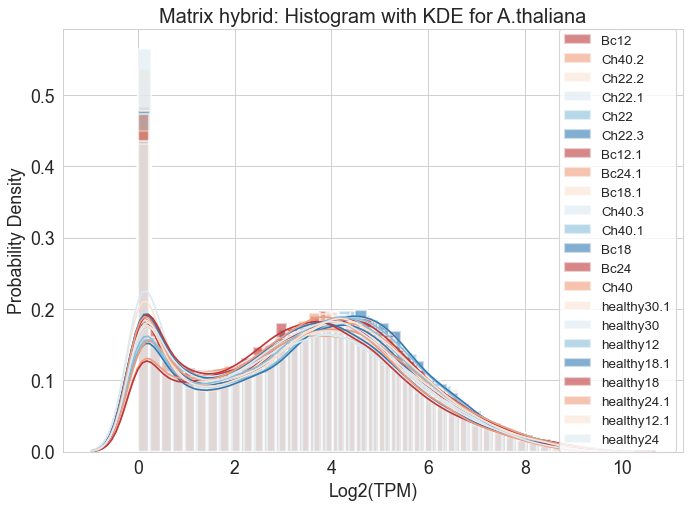

In [96]:
plot_KDE(df_plot, "Matrix hybrid",sample_lst, '--', 'Log2(TPM)')

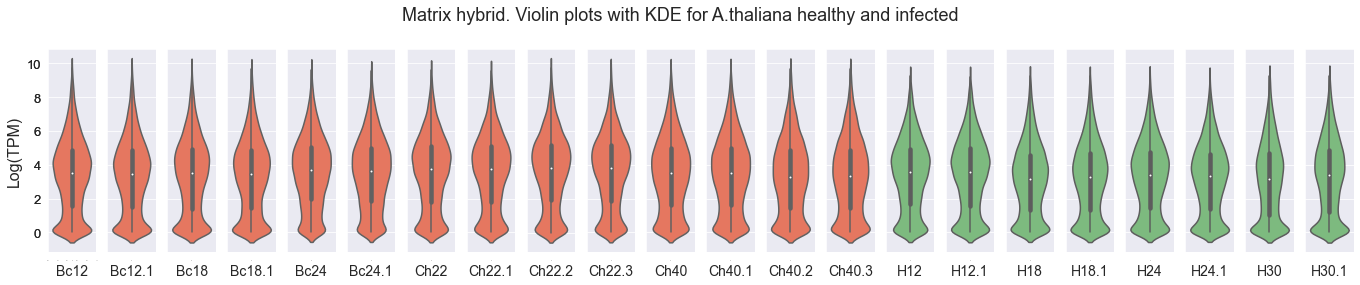

In [97]:
violin_plot(df_plot, "Matrix hybrid",'Log(TPM)')

In [99]:
df_with_label_ID(df_stat)

,ID,count,mean,std,min,25%,50%,75%,max
0,Bc12,20903.0,3.362,2.190,0.0,1.543,3.498,4.897,9.721
6,Bc12.1,20903.0,3.323,2.185,0.0,1.472,3.445,4.848,9.724
11,Bc18,20903.0,3.326,2.204,0.0,1.381,3.491,4.916,9.685
8,Bc18.1,20903.0,3.305,2.174,0.0,1.424,3.442,4.852,9.665
12,Bc24,20903.0,3.565,2.078,0.0,1.971,3.688,5.046,9.687
7,Bc24.1,20903.0,3.524,2.090,0.0,1.884,3.622,5.014,9.565
4,Ch22,20903.0,3.543,2.169,0.0,1.790,3.739,5.115,9.595
3,Ch22.1,20903.0,3.544,2.166,0.0,1.776,3.747,5.111,9.567
2,Ch22.2,20903.0,3.600,2.167,0.0,1.896,3.825,5.165,9.697
5,Ch22.3,20903.0,3.602,2.167,0.0,1.875,3.832,5.161,9.683


In [100]:
df_stat.to_csv("../statistics/matrix_hybrid_stats.csv", index=False, header=True)